In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/pdf/2025-05-04_US_weather_data_analysis/WeatherEvents_Jan2016-Dec2022.zip")

In [ ]:
df.shape

(8627181, 14)

In [ ]:
df.head()

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
0,W-1,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
1,W-2,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
2,W-3,Snow,Light,2016-01-07 05:54:00,2016-01-07 15:34:00,0.03,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
3,W-4,Snow,Light,2016-01-08 05:34:00,2016-01-08 05:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
4,W-5,Snow,Light,2016-01-08 13:54:00,2016-01-08 15:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0


In [ ]:
df.isnull().sum()

,0
EventId,0
Type,0
Severity,0
StartTime(UTC),0
EndTime(UTC),0
Precipitation(in),0
TimeZone,0
AirportCode,0
LocationLat,0
LocationLng,0


In [ ]:
df.isnull().sum()/8627181

,0
EventId,0.000000
Type,0.000000
Severity,0.000000
StartTime(UTC),0.000000
EndTime(UTC),0.000000
Precipitation(in),0.000000
TimeZone,0.000000
AirportCode,0.000000
LocationLat,0.000000
LocationLng,0.000000


In [ ]:
df.dropna(axis=0, inplace=True)
df.isnull().sum()


,0
EventId,0
Type,0
Severity,0
StartTime(UTC),0
EndTime(UTC),0
Precipitation(in),0
TimeZone,0
AirportCode,0
LocationLat,0
LocationLng,0


**Type Weather events**

In [ ]:
df['Type'].value_counts()

,count
Type,
Rain,4974556
Fog,1992230
Snow,1143419
Cold,230205
Precipitation,156549
Storm,58114
Hail,2909


In [ ]:
df['Type'].value_counts(normalize=True)

,proportion
Type,
Rain,0.581277
Fog,0.232792
Snow,0.133608
Cold,0.026899
Precipitation,0.018293
Storm,0.006791
Hail,0.000340


In [ ]:
df['Type'].value_counts(normalize=True)

,proportion
Type,
Rain,0.581277
Fog,0.232792
Snow,0.133608
Cold,0.026899
Precipitation,0.018293
Storm,0.006791
Hail,0.000340


<Axes: xlabel='Type'>

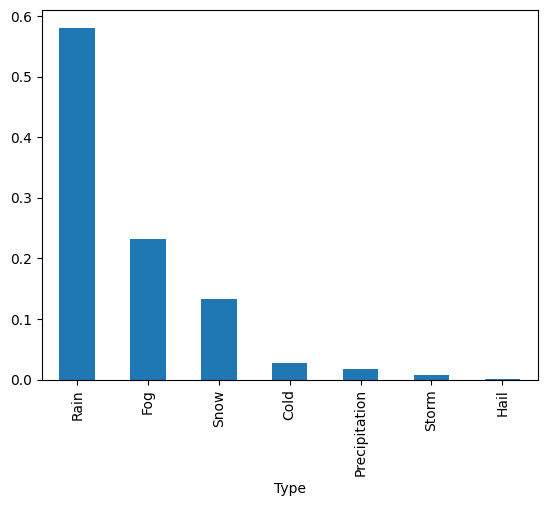

In [ ]:
df['Type'].value_counts(normalize=True).plot(kind='bar')

**severity**

In [ ]:
df['Severity'].value_counts()

,count
Severity,
Light,5114329
Severe,1707251
Moderate,1359118
Heavy,217826
UNK,156549
Other,2909


In [ ]:
df['Severity'].value_counts(normalize=True)

,proportion
Severity,
Light,0.597609
Severe,0.199492
Moderate,0.158813
Heavy,0.025453
UNK,0.018293
Other,0.000340


<Axes: xlabel='Severity'>

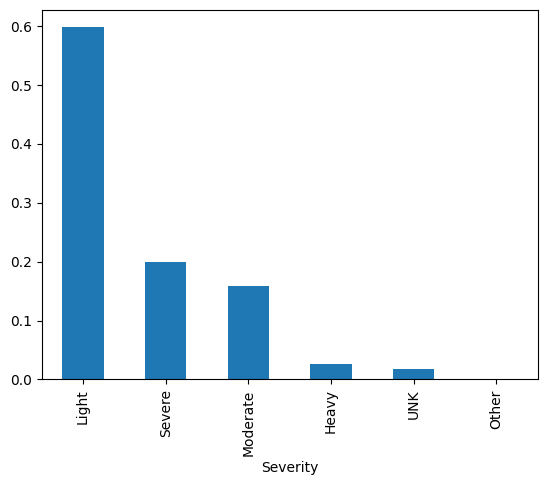

In [ ]:
df['Severity'].value_counts(normalize=True).plot(kind='bar')

In [ ]:
df[['Type','Severity']].value_counts()

,,count
Type,Severity,
Rain,Light,4136499
Fog,Severe,1418932
Snow,Light,977830
Rain,Moderate,658718
Fog,Moderate,573298
Cold,Severe,230205
Rain,Heavy,179339
Precipitation,UNK,156549
Snow,Moderate,127102


In [ ]:
data_time_format=%Y,%m,%d,%H,%m,%S

df['End']=pd.to_datetime(df[('Endtime(UTC)')],format=date_time_format)
df['Start']=pd.to_datetime(df[('Starttime(UTC)')],format=date_time_format)

df['Duration']=df['End']-df['Start']
df['Duration']=df['Duration'].dt.total_seconds()
df['Duration']=df['Duration']/(3600)

UsageError: Line magic function `%Y,%m,%d,%H,%m,%S` not found.


In [ ]:
df['Duration'].max() , df['Duration'].min()

In [ ]:
df[df['Duration']=df['Duration'].max()]

In [ ]:
df['Duration'].quantile(0.01,0.05,0.25,0.05,0.75,0.95,0.99)

In [ ]:
df=df[df['Duration']<=df['Duration'].quantile(0.99)]
df.shape

In [ ]:
df.colums

In [ ]:
df2=df.groupby(['Airportcode','City','State','LocationLat','LocationLng','Type','Severity']).agg({Duration :['sum','mean','std']}).rest_index()

In [ ]:
df2

In [ ]:
df2.colums

In [ ]:
south"AL", "GA', 'FL', 'SC', 'WC", "TN', 'HS", "LA", "AR", "ок", "K"]

atlantic [KY', 'VA', 'W', 'MD', 'DE', 'PA',

new england [NY', 'CT', 'RI', 'MA', 'VT", "W", "ME"]

midwest [OH, IN', 'MI, IL, WI, IA, HO, M, 'NE', 'KS', '50', '10']

west['HT', 'w', 'ID', 'NV', 'UT', 'CO', 'AZ', '10"]

pacific [AK", "MA", OR', 'CA', 'HI']

df2.loc/df2| State'].isin (south), 'Region'] 'South"

df2.loc(df2[State'].isin(atlantic), 'Region'] 'Atlantic'

df2.loc[df2['State'].isin(new_england), 'Region'] = 'New England

df2.loc[df2[State"].isin(midwest), 'Region'] "Midwest"

df2.loc[df2['State"].isin(atlantic, 'Region'] 'Atlantic

df2.loc[df2/'State'].isin(atlantic), 'Region'] 'Atlantic'



In [ ]:
level_0_columns

df2.columns.get_level_values(0)

level 1_columns df2.columns.get_level_values (1)

level_0_columns,level_1_columns

In [ ]:
column[x' 'sy if len(y)>0 else x for x,y in zip(level_0_columns, level_i_columns)]

columns

In [ ]:
df2.columns = columns

In [ ]:
df2.groupby('Region').agg({'Duration_sum': sum))

In [ ]:
df2.groupby('Region').agg({"Duration_sum': 'sum")).plot(kind= "bar")

In [ ]:
df2.groupby(["Type', 'Region']).agg(("Duration_sum': 'sum')).reset_index()

In [ ]:
0e", "Region']).agg(("Duration sum't 'sum']).reset_index().sort_values(by- Duration, sun", asconding-False)


In [ ]:
fig sumpa,histogram(df2, xsType", yo "Duration sum', histfone 'avg', color Severity' title "Fig 1. Nation Wide weather Events Duration')

fig sum upåste xaxes(categoryorder'nean descending')

fig sum.update yuses[title text="Rean of Duration & per Year')

fig sun.spdate layout (height-750, width-1000)

Fig sum.show()

In [ ]:
weather = df2.copy()

In [ ]:
fig city px.scatter_geo(weather, lak LocationLat', lon 'Locationing', hover_name weather['City'], + weather['State'], scope="usa",

title='Fig 4. Cities Involved in this Dataset')

fig city.show()

In [ ]:
pre flatf.grosby (AirportCode", "City", "State", "Locationtat", "Locationing", "Type"}).agg(("Duration":["sum'])).reset indre()

pre flat.colums pd.Poltiindes.from taples((("AirportCode", ""), ("City", ("Duration","

("State","","Locationtat"," ("Locationing","")("Typ

pre flat.columspre flat.columns.pet level values(0)

Yearly Percentage

renaturation) pre flat["Duration')/ (24%).65) pre flat pre flat, sort, values(By Duration

pre flat plvet table(index AirportCafe', columns"Type", valursa "Duration').reset index().filima (8)
of flat.columes platiledes, from tuples((("", "Airportlade, ' Precipitation"),"","S

fflat.columsal het.columns.pet level values (3)

uniquetry #12 AirportCode", "City",

"State", "gom", "Locationtat", "Locating").sort values(By AirportCode').drop duplicates() weather pd.serge(flet, uniquetry, has "Inner", on AirportCade")

In [ ]:
figwowpscatter grocurather, lat-Locationtat, lons "Locatiosing

color-Sov", hover nameswather City'

weather State'l,

color continuous stelesome",

title City Mide Snow Days Percentage lach Year from 2016 to 20213

fig,www.show()

In [ ]:
figwowpscatter grocurather, lat-Locationtat, lons "Locatiosing

color-Sov", hover nameswather City'

weather State'l,

color continuous stelesome",

title City Mide Snow Days Percentage lach Year from 2016 to 20212

fig,www.show()